# Cleaning and exploring Data

In [67]:
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

In [68]:
df = pd.read_csv('raw.csv', header=None)

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,1.0,0.013694,0.024678,0.130142,0.000040,-0.092436,-0.084620,0.001543,0.019859,0.120984,...,0.127987,-0.000244,0.005662,-0.000609,0.004237,0.010671,0.128107,-0.000149,0.004620,-0.000293
1,1.0,0.000885,0.009893,0.126730,-0.000118,-0.010667,-0.021169,-0.003575,0.011060,0.124755,...,0.129274,0.000009,0.005978,0.003971,0.001723,0.009085,0.127807,0.000072,0.006862,0.000465
2,1.0,0.002860,0.013634,0.127299,0.000135,0.008220,-0.033392,0.007499,0.017285,0.131818,...,0.128017,0.000040,-0.003118,0.003624,0.000316,0.007169,0.127418,0.000009,-0.003845,0.003718
3,1.0,-0.027728,0.012108,0.129483,0.000009,0.004620,-0.096685,-0.021113,0.015160,0.125892,...,0.127628,0.000040,-0.002929,-0.003104,-0.006029,0.011898,0.127418,0.000040,-0.003687,-0.000198
4,1.0,-0.000253,0.012766,0.125084,0.000040,0.007967,-0.028718,0.006811,0.014831,0.124844,...,0.127897,-0.000055,-0.001381,-0.000040,0.001304,0.012886,0.128047,-0.000118,-0.003813,0.000497


## Making a new dataframe (assuming that this is the right format)

In [70]:
df1 = pd.DataFrame(columns=['X1','Y1','Z1','X2','Y2','Z2','Label'])

In [71]:
rows = len(df.index)
col = len(df.columns)
col

601

In [72]:
for j in range(0,rows):
    i=1
    while i<col-5:
        df1 = df1.append({'X1' : df[i][j], 'Y1' : df[i+1][j], 'Z1' : df[i+2][j], 'X2' : df[i+3][j], 'Y2' : df[i+4][j], 'Z2' : df[i+5][j], 'Label' : df[0][j]}, ignore_index=True)
        i=i+6

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1500 non-null   float64
 1   Y1      1500 non-null   float64
 2   Z1      1500 non-null   float64
 3   X2      1500 non-null   float64
 4   Y2      1500 non-null   float64
 5   Z2      1500 non-null   float64
 6   Label   1500 non-null   float64
dtypes: float64(7)
memory usage: 82.2 KB


In [74]:
df1.head()

,X1,Y1,Z1,X2,Y2,Z2,Label
0,0.013694,0.024678,0.130142,0.000040,-0.092436,-0.084620,1.0
1,0.001543,0.019859,0.120984,0.000009,-0.106838,-0.104518,1.0
2,-0.004772,0.017315,0.118050,-0.000149,-0.111291,-0.099685,1.0
3,-0.008513,0.018961,0.118230,-0.000244,-0.091457,-0.073945,1.0
4,-0.007705,0.017704,0.117123,0.000072,-0.056020,-0.053100,1.0


In [75]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,1.0,0.013694,0.024678,0.130142,0.000040,-0.092436,-0.084620,0.001543,0.019859,0.120984,...,0.127987,-0.000244,0.005662,-0.000609,0.004237,0.010671,0.128107,-0.000149,0.004620,-0.000293
1,1.0,0.000885,0.009893,0.126730,-0.000118,-0.010667,-0.021169,-0.003575,0.011060,0.124755,...,0.129274,0.000009,0.005978,0.003971,0.001723,0.009085,0.127807,0.000072,0.006862,0.000465
2,1.0,0.002860,0.013634,0.127299,0.000135,0.008220,-0.033392,0.007499,0.017285,0.131818,...,0.128017,0.000040,-0.003118,0.003624,0.000316,0.007169,0.127418,0.000009,-0.003845,0.003718
3,1.0,-0.027728,0.012108,0.129483,0.000009,0.004620,-0.096685,-0.021113,0.015160,0.125892,...,0.127628,0.000040,-0.002929,-0.003104,-0.006029,0.011898,0.127418,0.000040,-0.003687,-0.000198
4,1.0,-0.000253,0.012766,0.125084,0.000040,0.007967,-0.028718,0.006811,0.014831,0.124844,...,0.127897,-0.000055,-0.001381,-0.000040,0.001304,0.012886,0.128047,-0.000118,-0.003813,0.000497


In [76]:
df1.tail()

,X1,Y1,Z1,X2,Y2,Z2,Label
1495,-0.025213,-0.016864,0.123108,0.000009,-0.011141,-0.041951,2.0
1496,-0.024555,-0.021533,0.115417,0.000072,-0.035081,-0.042867,2.0
1497,-0.028655,-0.029374,0.111167,-0.000118,-0.039913,-0.038161,2.0
1498,-0.025992,-0.035809,0.113801,-0.000149,-0.026869,-0.018295,2.0
1499,-0.023328,-0.034851,0.122719,0.000103,-0.011741,-0.005946,2.0


In [77]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
10,2.0,0.019560,0.037158,0.123019,-0.000118,-0.026174,-0.038003,0.014802,0.036979,0.110568,...,0.173659,0.000009,0.044636,0.028859,0.009534,0.004386,0.176861,0.000040,0.039803,0.088899
11,2.0,-0.010818,-0.007107,0.127688,0.000009,0.000956,0.011993,-0.011356,-0.008723,0.130411,...,0.125623,0.000040,0.048394,-0.026539,-0.040477,-0.010998,0.127837,-0.000055,0.035824,-0.023728
12,2.0,0.012826,-0.004623,0.127418,0.000166,0.009673,-0.071987,0.028330,0.011479,0.135649,...,0.166266,-0.000023,-0.067769,0.090920,-0.002228,-0.036138,0.159203,0.000166,-0.087225,0.026237
13,2.0,0.014263,0.010073,0.122241,0.000198,-0.036028,-0.063617,0.017016,0.006152,0.121403,...,0.107605,0.000198,-0.010193,0.091394,-0.016235,-0.026082,0.113950,0.000135,-0.011709,0.079645
14,2.0,0.029108,0.002680,0.124246,0.000072,-0.033312,-0.073566,0.028180,0.003458,0.130142,...,0.113801,-0.000149,-0.026869,-0.018295,-0.023328,-0.034851,0.122719,0.000103,-0.011741,-0.005946


## Splitting the dataset to visualize 

In [78]:
lying = df1[df1['Label']==0.0]
standing = df1[df1['Label']==1.0]
walking = df1[df1['Label']==2.0]


In [79]:
lying_d1 = lying[['X1','Y1','Z1']]
standing_d1 = standing[['X1','Y1','Z1']]
walking_d1 = walking[['X1','Y1','Z1']]

lying_d2 = lying[['X2','Y2','Z2']]
standing_d2 = standing[['X2','Y2','Z2']]
walking_d2 = walking[['X2','Y2','Z2']]


## Scatter plot for lying (Sensor 1)

/tmp/ipykernel_3536/2390311343.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


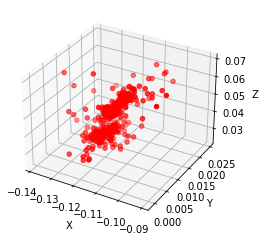

In [80]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(lying_d1['X1'], lying_d1['Y1'], lying_d1['Z1'], color = 'red')
# threedee.scatter(standing_d1['X1'], standing_d1['Y1'], standing_d1['Z1'], color = 'green')
# threedee.scatter(walking_d1['X1'], walking_d1['Y1'], walking_d1['Z1'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## Scatter plot for standing (Sensor 1)

/tmp/ipykernel_3536/16553740.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


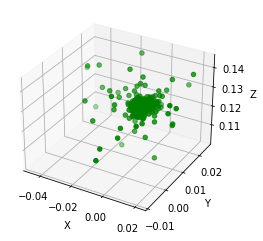

In [81]:
threedee = plt.figure().gca(projection='3d')
# threedee.scatter(lying_d1['X1'], lying_d1['Y1'], lying_d1['Z1'], color = 'red')
threedee.scatter(standing_d1['X1'], standing_d1['Y1'], standing_d1['Z1'], color = 'green')
# threedee.scatter(walking_d1['X1'], walking_d1['Y1'], walking_d1['Z1'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## Scatter plot for walking (Sensor 1)

/tmp/ipykernel_3536/1405145364.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


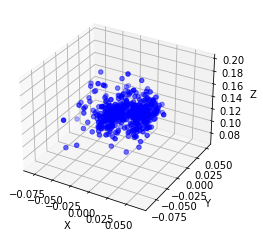

In [82]:
threedee = plt.figure().gca(projection='3d')
# threedee.scatter(lying_d1['X1'], lying_d1['Y1'], lying_d1['Z1'], color = 'red')
# threedee.scatter(standing_d1['X1'], standing_d1['Y1'], standing_d1['Z1'], color = 'green')
threedee.scatter(walking_d1['X1'], walking_d1['Y1'], walking_d1['Z1'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## Scatter plot of all three (Sensor 1)

/tmp/ipykernel_3536/4190260941.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


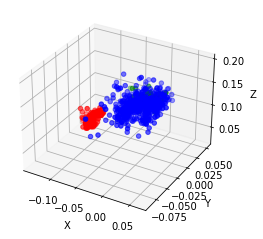

In [83]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(lying_d1['X1'], lying_d1['Y1'], lying_d1['Z1'], color = 'red')
threedee.scatter(standing_d1['X1'], standing_d1['Y1'], standing_d1['Z1'], color = 'green')
threedee.scatter(walking_d1['X1'], walking_d1['Y1'], walking_d1['Z1'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## Scatter plot for lying (Sensor 2)

/tmp/ipykernel_3536/2705366721.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


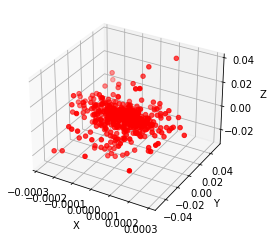

In [84]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(lying_d2['X2'], lying_d2['Y2'], lying_d2['Z2'], color = 'red')
# threedee.scatter(standing_d2['X2'], standing_d2['Y2'], standing_d2['Z2'], color = 'green')
# threedee.scatter(walking_d2['X2'], walking_d2['Y2'], walking_d2['Z2'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## Scatter plot for standing (Sensor 2)

/tmp/ipykernel_3536/18094225.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


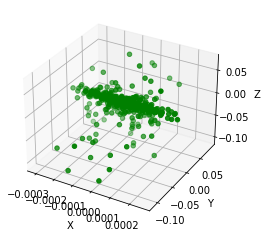

In [85]:
threedee = plt.figure().gca(projection='3d')
# threedee.scatter(lying_d2['X2'], lying_d2['Y2'], lying_d2['Z2'], color = 'red')
threedee.scatter(standing_d2['X2'], standing_d2['Y2'], standing_d2['Z2'], color = 'green')
# threedee.scatter(walking_d2['X2'], walking_d2['Y2'], walking_d2['Z2'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## Scatter plot for walking (Sensor 2)

/tmp/ipykernel_3536/691108970.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


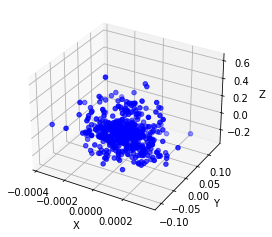

In [86]:
threedee = plt.figure().gca(projection='3d')
# threedee.scatter(lying_d2['X2'], lying_d2['Y2'], lying_d2['Z2'], color = 'red')
# threedee.scatter(standing_d2['X2'], standing_d2['Y2'], standing_d2['Z2'], color = 'green')
threedee.scatter(walking_d2['X2'], walking_d2['Y2'], walking_d2['Z2'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()

## Scatter plot for all three (Sensor 2)

/tmp/ipykernel_3536/2218711176.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


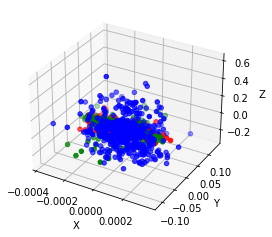

In [87]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(lying_d2['X2'], lying_d2['Y2'], lying_d2['Z2'], color = 'red')
threedee.scatter(standing_d2['X2'], standing_d2['Y2'], standing_d2['Z2'], color = 'green')
threedee.scatter(walking_d2['X2'], walking_d2['Y2'], walking_d2['Z2'], color = 'blue')
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
plt.show()